# TP2 Programmation en Python


# 1 Lecture et affichage d’une image

1 & 2 Ouverture du fichier image .bpm et stockage dans un ndarray

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_RGB = Image.open( "../lena24.bmp")
array_RGB = np.array(image_RGB)


image_gris = image_RGB.convert ("L")

3 & 4 Convertion de l'image RGB en niveaux de gris et affichage

Text(0.5, 1.0, 'Image en nuances de gris')

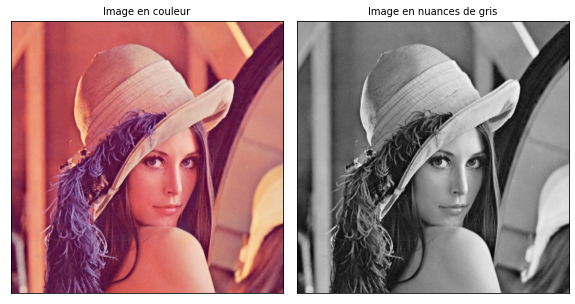

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10,6), subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)  

ax[0].imshow(array_RGB)
ax[0].set_title("Image en couleur",size =10)
ax[1].imshow(image_gris,'gray')
ax[1].set_title("Image en nuances de gris",size =10)

# 2. Fonction de convertion en nuances de gris

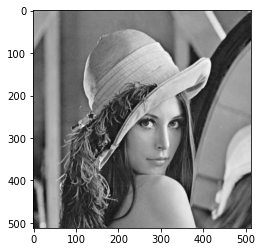

In [6]:
gray = np.copy(image_gris)
row, col = np.shape(image_gris)
for i in range (row):
    for j in range (col):
        temp_pix = (array_RGB[i,j,0]/3+array_RGB[i,j,1]/3+array_RGB[i,j,2]/3)
        gray[i,j]=temp_pix.astype(np.uint8)
        
plt.imshow(gray,'gray')

# 2 Traitement de l’image RGB

1. Nouvelle image avec certains pixels de l’image à blanc

In [19]:
np.shape(array_RGB)

(512, 512, 3)

In [20]:
cp_array_RGB = np.copy(array_RGB)

In [21]:
np.shape(cp_array_RGB)

(512, 512, 3)

In [28]:
for i in range(60):
    for j in range(60):
        cp_array_RGB[i,j][0]= 255
        cp_array_RGB[i,j][1]= 255
        cp_array_RGB[i,j][2]= 255

Text(0.5, 1.0, 'Image avec ajout de pixels à blanc')

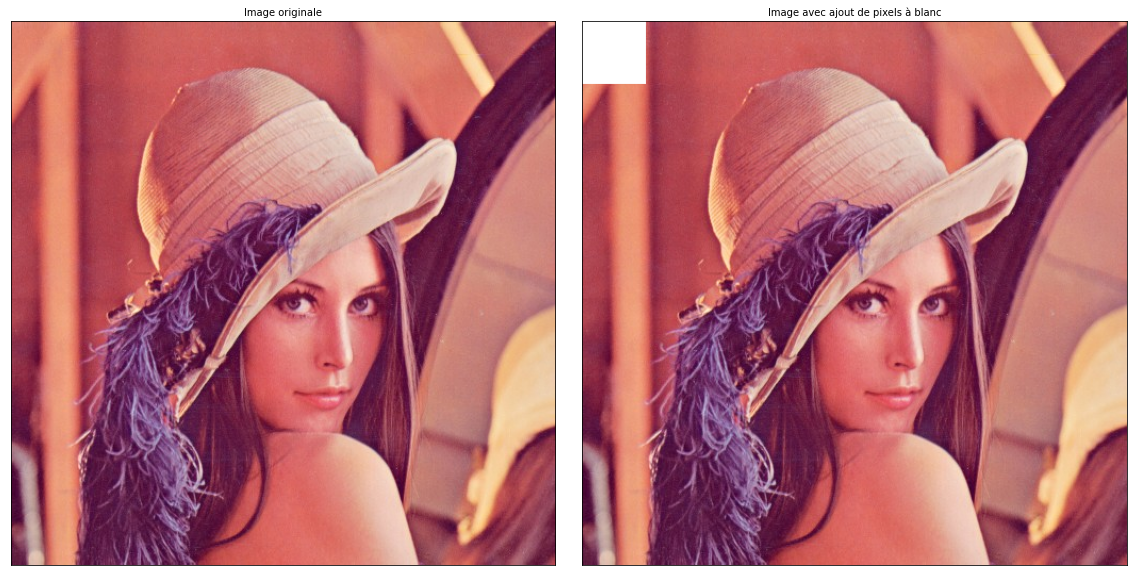

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(20,20), subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)  

ax[0].imshow(array_RGB)
ax[0].set_title("Image originale",size =10)
ax[1].imshow(cp_array_RGB)
ax[1].set_title("Image avec ajout de pixels à blanc",size =10)

2. Nouvelle image en supprimant une des trois composantes de couleur dans toute l’image.

In [31]:
img_R= np.copy(array_RGB)
img_B= np.copy(array_RGB)
img_V= np.copy(array_RGB)
img_R[:,:,1]=img_R[:,:,2]=0
img_V[:,:,0]=img_V[:,:,2]=0
img_B[:,:,0]=img_B[:,:,1]=0

3. Affichage de l'image sur un canal à la fois

Text(0.5, 1.0, 'image en vert')

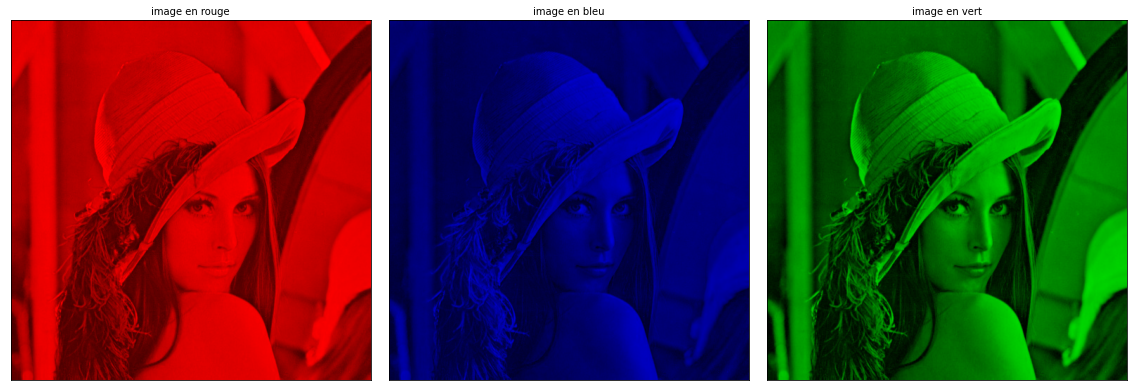

In [60]:
fig, ax = plt.subplots(1, 3, figsize=(20,20), subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)  

ax[0].imshow(img_R)
ax[0].set_title("image en rouge",size =10)
ax[1].imshow(img_B)
ax[1].set_title("image en bleu",size =10)
ax[2].imshow(img_V)
ax[2].set_title("image en vert",size =10)


4. Autres traitements 

Garder deux canaux à chaque fois

Text(0.5, 1.0, 'Image en vert et bleu')

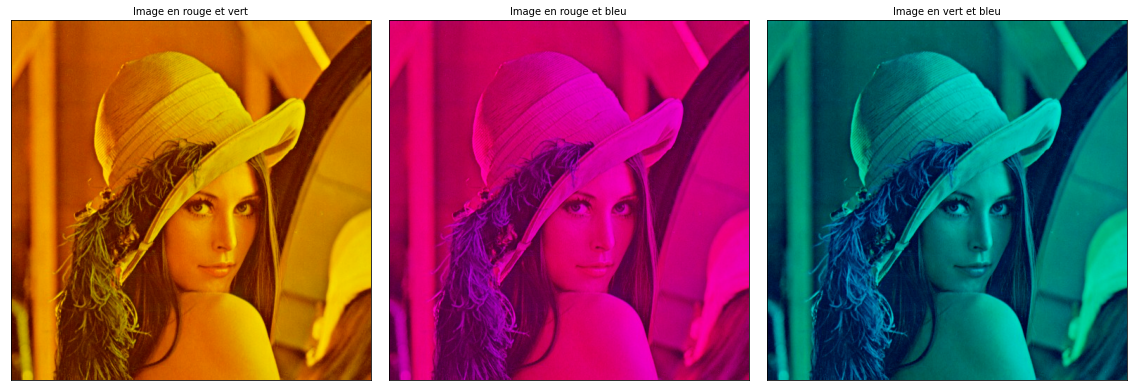

In [59]:
img_RV= np.copy(array_RGB)
img_RB= np.copy(array_RGB)
img_BV= np.copy(array_RGB)
img_RV[:,:,2]=0
img_RB[:,:,1]=0
img_BV[:,:,0]=0

fig, ax = plt.subplots(1, 3, figsize=(20,20), subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)  

ax[0].imshow(img_RV)
ax[0].set_title("Image en rouge et vert",size =10)
ax[1].imshow(img_RB)
ax[1].set_title("Image en rouge et bleu",size =10)
ax[2].imshow(img_BV)
ax[2].set_title("Image en vert et bleu",size =10)

Inversition de canaux

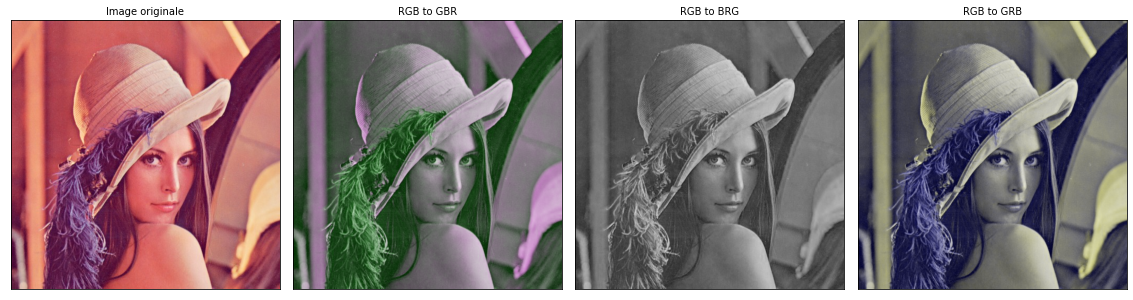

In [58]:
Img_GBR= np.copy(array_RGB)
Img_BRG= np.copy(array_RGB)
Img_GRB= np.copy(array_RGB)

Img_GBR[:,:,0], Img_GBR[:,:,1], Img_GBR[:,:,2] = Img_GBR[:,:,1], Img_GBR[:,:,2],Img_GBR[:,:,0]
Img_BRG[:,:,0], Img_BRG[:,:,1], Img_BRG[:,:,2] = Img_BRG[:,:,2], Img_BRG[:,:,0],Img_BRG[:,:,1]
Img_GRB[:,:,0], Img_GRB[:,:,1], Img_GRB[:,:,2] = Img_GRB[:,:,1], Img_GRB[:,:,0],Img_GRB[:,:,2]

fig, ax = plt.subplots(1, 4, figsize=(20,20), subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)  

ax[0].imshow(image_RGB)
ax[0].set_title("Image originale",size =10)
ax[1].imshow(Img_GBR)
ax[1].set_title("RGB to GBR",size =10)
ax[2].imshow(Img_BRG)
ax[2].set_title("RGB to BRG",size =10)
ax[3].imshow(Img_GRB)
ax[3].set_title("RGB to GRB",size =10);

# 3 Bruit et Filtrage

1 & 2 Fonction qui ajoute un bruit poivre et sel et gaussien à une image en niveaux de gris. 

In [45]:
import random

def bruit_poivre_sel(img,nbpixels = 300):
    # J'ai decidé de pas prendre trop de points pour pas 
    # fortement attaquer l'image
    
    img = np.array(img)
    row, col = np.shape(img)
    number_of_pixels_W = number_of_pixels_B = nbpixels
    
    for i in range(number_of_pixels_W):
        y_coord=random.randint(0,row-1)
        x_coord=random.randint(0,col-1)
        img[y_coord][x_coord] = 255
        
    for i in range(number_of_pixels_B):
        y_coord=random.randint(0,row-1)
        x_coord=random.randint(0,col-1)
        img[y_coord][x_coord] = 0
    return img

def bruit_gaussien(img,alpha = 2): 
    img = np.array(img)
    mean = 0   
    std = 15 
    return img + alpha*np.random.normal(mean, std, img.shape)


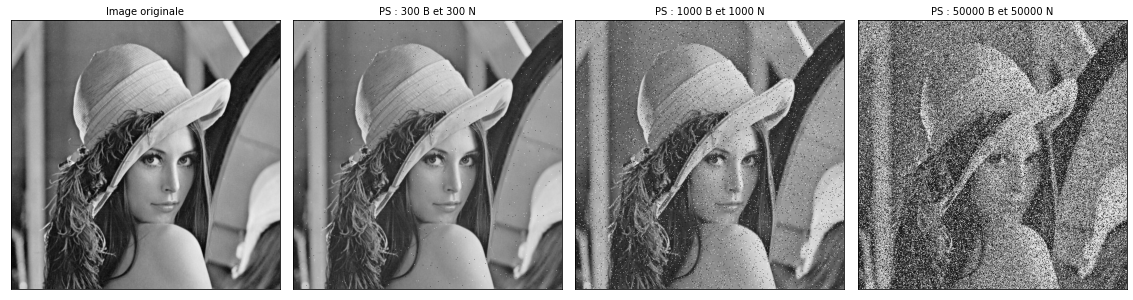

In [57]:
fig, ax = plt.subplots(1, 4, figsize=(20,20), subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)                      
ax[0].imshow(image_gris,'gray')
ax[0].set_title("Image originale",size =10)
ax[1].imshow(bruit_poivre_sel(image_gris),'gray')
ax[1].set_title("PS : 300 B et 300 N",size =10)
ax[2].imshow(bruit_poivre_sel(image_gris,5000),'gray')
ax[2].set_title("PS : 1000 B et 1000 N",size =10)
ax[3].imshow(bruit_poivre_sel(image_gris,50000),'gray')
ax[3].set_title("PS : 50000 B et 50000 N",size =10);

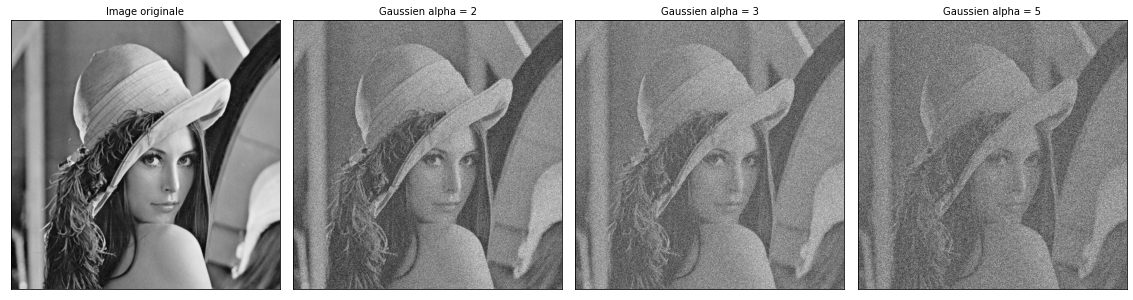

In [56]:
fig, ax = plt.subplots(1, 4, figsize=(20,20), subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)                      
ax[0].imshow(image_gris,'gray')
ax[0].set_title("Image originale",size =10)
ax[1].imshow(bruit_gaussien(image_gris),'gray')
ax[1].set_title("Gaussien alpha = 2",size =10)
ax[2].imshow(bruit_gaussien(image_gris,3),'gray')
ax[2].set_title("Gaussien alpha = 3",size =10)
ax[3].imshow(bruit_gaussien(image_gris,5),'gray')
ax[3].set_title("Gaussien alpha = 5",size =10);


3 & 4 Filtre médian et moyenneur 

In [51]:
def m_filter(img):
    img = np.array(img)
    row, col = np.shape(img)
    cp = np.copy(img)
    mask = (1/9)*np.ones([3,3])
    for i in range(1,row-1):
        for j in range(1,col-1):
            img[i,j] = mask[0,0]*cp[i-1,j-1]+mask[0,1]*cp[i-1,j]+mask[0,2]*cp[i-1,j+1]+mask[1,0]*cp[i,j-1]+mask[1,1]*cp[i,j]+mask[1,2]*cp[i,j+1]+mask[2,0]*cp[i+1,j-1]+mask[2,1]*cp[i+1,j]+mask[2,2]*cp[i+1,j+1]
    return img
def median_filter(img):
    img = np.array(img)
    row, col = np.shape(img)
    cp = np.copy(img)
    for i in range(1,row-1):
        for j in range(1,col-1):
            var = [cp[i-1,j-1],cp[i-1,j],cp[i-1,j+1],cp[i,j-1],cp[i,j],cp[i,j+1],cp[i+1,j-1],cp[i+1,j],cp[i+1,j+1]]
            var.sort()
            img[i,j] = var[4]     
    return img

Correction filtre médian et moyenneur

Ligne 0 : Images attaquées au bruit poivre et sel en variant le nombre de pixels chosis
Ligne 1 : Images corrigées au filtre moyenneur pour les images au bruit poivre et sel correspondantes
Ligne 2 : Images corrigées au filtre médian pour les images au bruit poivre et sel correspondantes 
Ligne 3 : Images attaquées au bruit gaussien en variant le paramètre alpha
Ligne 4 : Images corrigées au filtre moyenneur pour les images au bruit gaussien correspondantes
Ligne 5 : Images corrigées au filtre médian pour les images au bruit gaussien correspondantes


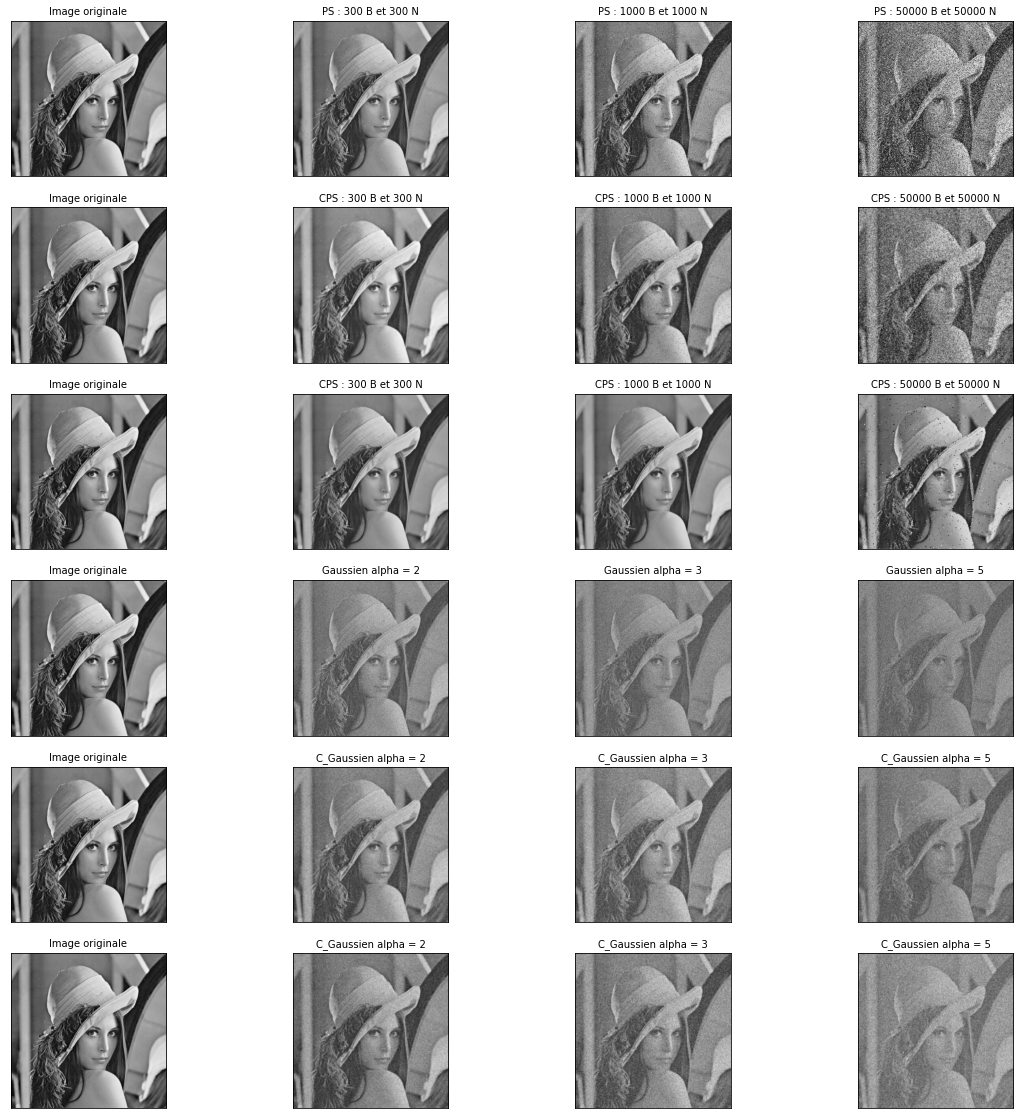

In [55]:
fig, ax = plt.subplots(6, 4, figsize=(20,20), subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)  

# Image au bruit poivre et sel
ax[0][0].imshow(image_gris,'gray')
ax[0][0].set_title("Image originale",size =10)
ax[0][1].imshow(bruit_poivre_sel(image_gris),'gray')
ax[0][1].set_title("PS : 300 B et 300 N",size =10)
ax[0][2].imshow(bruit_poivre_sel(image_gris,5000),'gray')
ax[0][2].set_title("PS : 1000 B et 1000 N",size =10)
ax[0][3].imshow(bruit_poivre_sel(image_gris,50000),'gray')
ax[0][3].set_title("PS : 50000 B et 50000 N",size =10)

# Image au bruit poivre et sel corrigée filtre moyennneur
ax[1][0].imshow(image_gris,'gray')
ax[1][0].set_title("Image originale",size =10)
ax[1][1].imshow(m_filter(bruit_poivre_sel(image_gris)),'gray')
ax[1][1].set_title("CPS : 300 B et 300 N",size =10)
ax[1][2].imshow(m_filter(bruit_poivre_sel(image_gris,5000)),'gray')
ax[1][2].set_title("CPS : 1000 B et 1000 N",size =10)
ax[1][3].imshow(m_filter(bruit_poivre_sel(image_gris,50000)),'gray')
ax[1][3].set_title("CPS : 50000 B et 50000 N",size =10)

# Image au bruit poivre et sel corrigée filtre médian
ax[2][0].imshow(image_gris,'gray')
ax[2][0].set_title("Image originale",size =10)
ax[2][1].imshow(median_filter(bruit_poivre_sel(image_gris)),'gray')
ax[2][1].set_title("CPS : 300 B et 300 N",size =10)
ax[2][2].imshow(median_filter(bruit_poivre_sel(image_gris,5000)),'gray')
ax[2][2].set_title("CPS : 1000 B et 1000 N",size =10)
ax[2][3].imshow(median_filter(bruit_poivre_sel(image_gris,50000)),'gray')
ax[2][3].set_title("CPS : 50000 B et 50000 N",size =10)

# Image au bruit gaussien
ax[3][0].imshow(image_gris,'gray')
ax[3][0].set_title("Image originale",size =10)
ax[3][1].imshow(bruit_gaussien(image_gris),'gray')
ax[3][1].set_title("Gaussien alpha = 2",size =10)
ax[3][2].imshow(bruit_gaussien(image_gris,3),'gray')
ax[3][2].set_title("Gaussien alpha = 3",size =10)
ax[3][3].imshow(bruit_gaussien(image_gris,5),'gray')
ax[3][3].set_title("Gaussien alpha = 5",size =10)

# Image au bruit gaussien corrigée filtre moyennneur
ax[4][0].imshow(image_gris,'gray')
ax[4][0].set_title("Image originale",size =10)
ax[4][1].imshow(m_filter(bruit_gaussien(image_gris)),'gray')
ax[4][1].set_title("C_Gaussien alpha = 2",size =10)
ax[4][2].imshow(m_filter(bruit_gaussien(image_gris,3)),'gray')
ax[4][2].set_title("C_Gaussien alpha = 3",size =10)
ax[4][3].imshow(m_filter(bruit_gaussien(image_gris,5)),'gray')
ax[4][3].set_title("C_Gaussien alpha = 5",size =10)

# Image au bruit gaussien corrigée filtre moyennneur
ax[5][0].imshow(image_gris,'gray')
ax[5][0].set_title("Image originale",size =10)
ax[5][1].imshow(median_filter(bruit_gaussien(image_gris)),'gray')
ax[5][1].set_title("C_Gaussien alpha = 2",size =10)
ax[5][2].imshow(median_filter(bruit_gaussien(image_gris,3)),'gray')
ax[5][2].set_title("C_Gaussien alpha = 3",size =10)
ax[5][3].imshow(median_filter(bruit_gaussien(image_gris,5)),'gray')
ax[5][3].set_title("C_Gaussien alpha = 5",size =10);

Pour le bruit du poivre et du sel, la comparaison précédente démontre que le filtre médian est beaucoup plus efficace car il fournit une bien meilleure qualité d'image. Ce constat est en accord avec la théorie selon laquelle le filtre moyen dans sa reconstruction de l'image tend à la flouter davantage au limites. Le filtre médian, quant à lui, puisqu'il reste proche de la tendance centrale de la distribution des voisins produit un excellent résultat. Par exemple, si près d'un pixel que nous essayons de reconstruire, 1 ou 2 pixels sont blancs ou noirs. Ceux-ci auront une grande influence sur la coloration finale du pixel quitte à le faire passer d'une couleur proche du noir au blanc carrement. Pendant que le filtre médian préserve les informations aux limites.Car ces 1 ou 2 pixels seraint vu comme des outliers et n'auront donc pas finalement une grande influence sur la coloration finale du pixel à sa sortie.



Pour le bruit gaussien, par contre, le filtre moyen semble plus performant que le filtre médian même si la différence n'est pas perceptible. Cependant, la reconstruction fournie par le filtre médian est tout de même acceptable.